In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.metrics import roc_curve, auc, roc_auc_score
from time import time
import os
import glob
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

/home/dnslab/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dnslab/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe2` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1
/home/dnslab/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:18: DeprecationWarning: Please use `line_search_wolfe1` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_wolfe2, line_search_wolfe1


In [2]:
combined_data = pd.read_csv('Datasets.csv', header = 0)
combined_data

,ipv4_ver_0,ipv4_ver_1,ipv4_ver_2,ipv4_ver_3,ipv4_hl_0,ipv4_hl_1,ipv4_hl_2,ipv4_hl_3,ipv4_tos_0,ipv4_tos_1,...,tcp_opt_311,tcp_opt_312,tcp_opt_313,tcp_opt_314,tcp_opt_315,tcp_opt_316,tcp_opt_317,tcp_opt_318,tcp_opt_319,Class
0,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
1,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
2,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
3,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
4,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,Angler-EK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506443,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID
2506444,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID
2506445,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID
2506446,0,1,0,0,0,1,0,1,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,IcedID


In [3]:
def cmp(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
for i in range(1,11):
    data1, data2 = train_test_split(combined_data, test_size = 0.1, random_state = i)
    train_data, test_valid_data = train_test_split(data2, test_size=0.3, random_state=1)
    test_data, valid_data = train_test_split(test_valid_data, test_size=0.5, random_state=1)
    start = time.time()
    pred = TabularPredictor(label='Class').fit(train_data = train_data, tuning_data = valid_data)
    end = time.time()
    print("Time Duration>> ", end - start)
    y_true = pd.Series(test_data['Class'].values)
    y_pred = pred.predict(test_data)
    cmp(confusion_matrix(y_true, y_pred), ['Trickbot', 'Hancitor', 'Gootkit', 'Angler-EK', 'Rig-EK', 'IcedID',
       'Zeus', 'Dridex'], normalize=True, cmap=plt.cm.Oranges)
    plt.savefig(f'image{i}.png', dpi=300, bbox_inches='tight')

No path specified. Models will be saved in: "AutogluonModels/ag-20230427_202745/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230427_202745/"
AutoGluon Version:  0.1.0
Train Data Rows:    175451
Train Data Columns: 960
Tuning Data Rows:    37597
Tuning Data Columns: 960
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	8 unique label values:  ['Trickbot', 'Zeus', 'Rig-EK', 'Gootkit', 'Hancitor', 'IcedID', 'Dridex', 'Angler-EK']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 8
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    16118.58 MB
	Train Data (Original)  Memory Usage: 1636.21 MB (10.2% of available memory)
	Inferring data

AutoGluon will gauge predictive performance using evaluation metric: 'accuracy'
	To change this, specify the eval_metric argument of fit()
Fitting model: NeuralNetMXNet ...
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):
/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):

Time Duration>>  1387.7908418178558


/home/dnslab/.local/lib/python3.8/site-packages/mxnet/ndarray/utils.py:141: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  if spsp is not None and isinstance(source_array, spsp.csr.csr_matrix):


Normalized confusion matrix


In [5]:
y_true

0         Gootkit
1        Trickbot
2        Trickbot
3        Trickbot
4         Gootkit
           ...   
37592    Hancitor
37593    Trickbot
37594    Trickbot
37595    Trickbot
37596    Hancitor
Length: 37597, dtype: object

Normalized confusion matrix


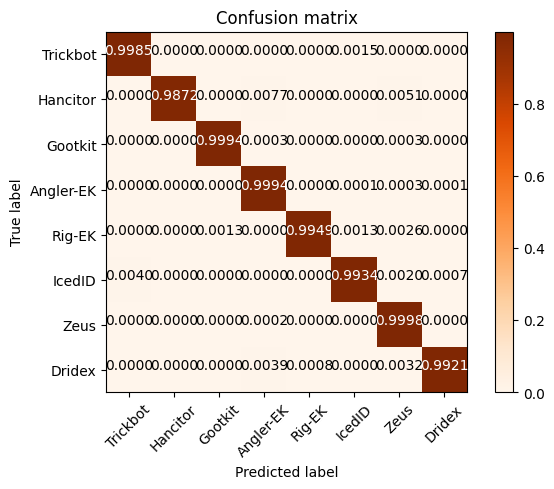

In [8]:
cmp(confusion_matrix(y_true, y_pred), ['Trickbot', 'Hancitor', 'Gootkit', 'Angler-EK', 'Rig-EK', 'IcedID',
       'Zeus', 'Dridex'], normalize=True, cmap=plt.cm.Oranges)
i = 1
plt.savefig(f'test{i}.png', dpi=300, bbox_inches='tight')